## DSI-06 Homework 1: ANSWERS
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?

*Yes, there is a relationship between the predictor and the response. We can reject the null hypothesis that the regression coefficients are zero, since the F-statistic is much larger than 1 and the p-value is zero.*

(ii) How strong is the relationship between the predictor and the response?

*Since the R-squared value is 0.606, we can say that approximately 60% of the variance in mpg is explained by horsepower.*

(iii) Is the relationship between the predictor and the response positive or negative?

*The relationship is negative because the coefficient corresponding to horsepower is equal to -0.1578.*


(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

*The predicted 'mpg' is equal to 24.47, with a 95% confidence interval of (-0.17, -0.15) and a 95% prediction interval of (23.97, 24.96).*

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        17:01:52   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

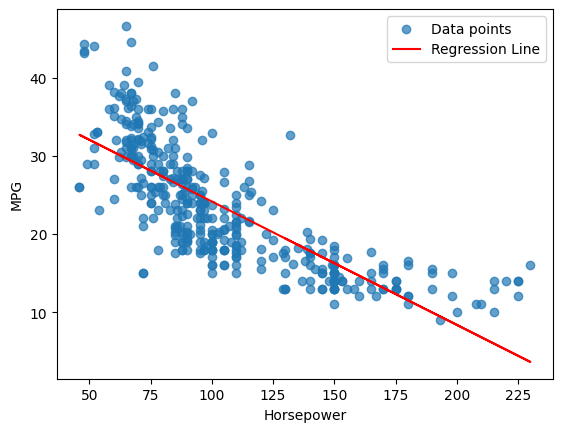

In [9]:
# Create the model matrix by hand
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
y = Auto['mpg']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Plotting the response and predictor
fig, ax = subplots()
ax.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.7, label='Data points')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')

# Adding the regression line
ax.plot(Auto['horsepower'], model.predict(X), color='red', label='Regression Line')
ax.legend()

In [2]:
# Adding a constant term to the predictor variable
X = sm.add_constant(Auto['horsepower'])
y = Auto['mpg']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           7.03e-81
Time:                        10:31:45   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [3]:
# Summarize results
summarize(model)

,coef,std err,t,P>|t|
const,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [4]:
intercept = 39.9359
slope = -0.1578
horsepower_value = 98

# Calculate predicted MPG
predicted_mpg = intercept + (slope * horsepower_value)
print(f"Predicted MPG: {predicted_mpg:.2f}")

Predicted MPG: 24.47


In [10]:
# Get confidence and prediction intervals
conf_interval = model.conf_int(alpha=0.05)
predict_interval = model.get_prediction(exog=[1, 98]).conf_int(alpha=0.05)

# Extract values from NumPy arrays
conf_interval_values = tuple(conf_interval.loc['horsepower'].values)
predict_interval_values = tuple(predict_interval[0])

print(f"95% Confidence Interval: {conf_interval_values}")
print(f"95% Prediction Interval: {predict_interval_values}")

95% Confidence Interval: (-0.17051700846435697, -0.14517245824295028)
95% Prediction Interval: (23.973078960703937, 24.961075344320903)


_b)_	Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

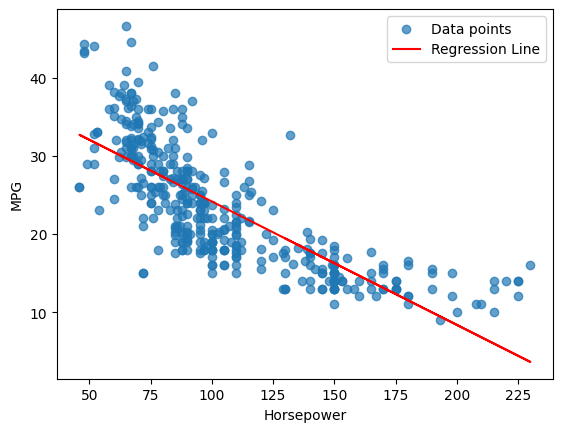

In [6]:
# Plotting the response and predictor
fig, ax = subplots()
ax.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.7, label='Data points')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')

# Adding the regression line
ax.plot(Auto['horsepower'], model.predict(X), color='red', label='Regression Line')
ax.legend()

_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

- The QQ plot indicates that the assumption of normality does hold, since we can fit a straight line quite well.
- For the Scale-Location plot, the residuals are plotted against the fitted values, but here they are all made positive and normalized.

Text(0.5, 1.0, 'Leverage-Residual Squared Plot')

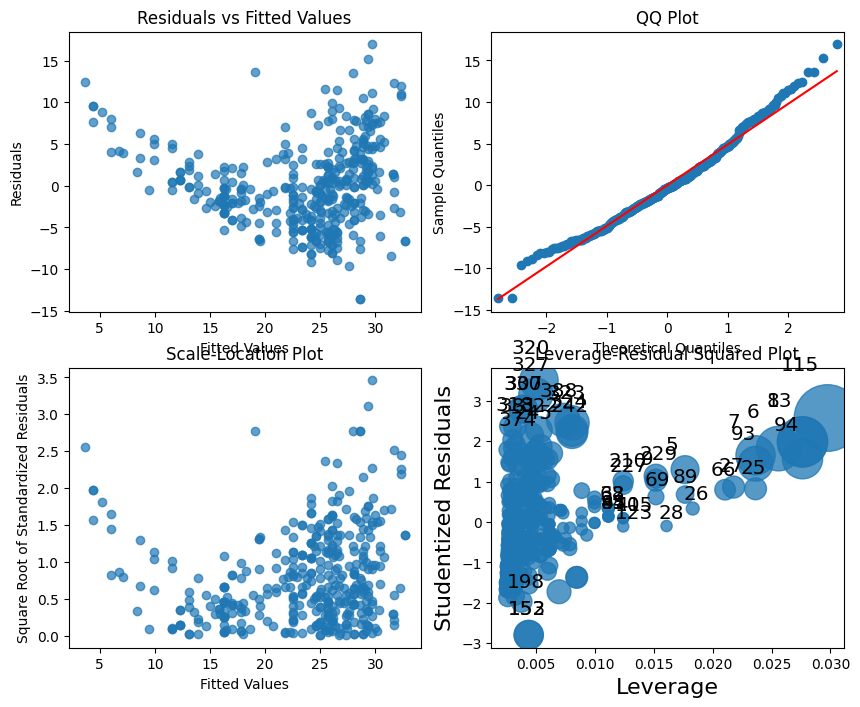

In [7]:
# Diagnostic plots
fig, ax = subplots(2, 2, figsize=(10, 8))

# Residuals vs Fitted Values
ax[0, 0].scatter(model.fittedvalues, model.resid, alpha=0.7)
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted Values')

# QQ Plot
sm.qqplot(model.resid, line='s', ax=ax[0, 1])
ax[0, 1].set_title('QQ Plot')

# Scale-Location plot
ax[1, 0].scatter(model.fittedvalues, abs(model.get_influence().resid_studentized_internal), alpha=0.7)
ax[1, 0].set_xlabel('Fitted Values')
ax[1, 0].set_ylabel('Square Root of Standardized Residuals')
ax[1, 0].set_title('Scale-Location Plot')

# Leverage-Residual Squared plot
sm.graphics.influence_plot(model, ax=ax[1, 1], criterion="cooks", text_coords=(0.1, 0.1))
ax[1, 1].set_title('Leverage-Residual Squared Plot')